In [3]:
# Installing the required packages
!pip install -U sentence-transformers

     |████████████████████████████████| 64 kB 297 kB/s eta 0:00:011
     |████████████████████████████████| 1.3 MB 541 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 17.5 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-py3-none-any.whl size=101031 sha256=0cf832b0c3df361a992f2cffcebd26d8fd43ec1fd8f7f960ddaef8d3475efcc9
  Stored in directory: /root/.cache/pip/wheels/b0/57/6e/72164eb7d28256df352bcce26174d9133d191c232006fb13d2
Successfully built sentence-transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.1rc1
    Uninstalling tokenizers-0.8.1rc1:
      Successfully uninstalled tokenizers-0.8.1rc1
  Attempting uninstall: transformers
    Found existing installation: transformers 3.0.2
    Uninstalling transformers-3.0.2:
      Successfully uninstalled transformers-3.0.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip wil

In [4]:
# Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sentence_transformers import SentenceTransformer, models
from torch import nn
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,f1_score,confusion_matrix

In [5]:
# Reating training Data
xtrain = pd.read_pickle('X_train.pickle')
ytrain = pd.read_pickle('y_train.pickle')

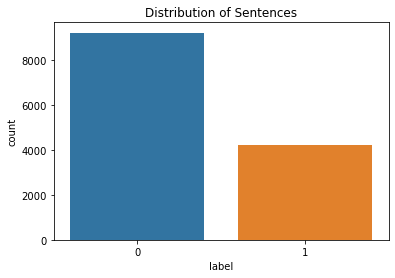

In [6]:
# Loading Data into Panda and looking at the distribution
d = {'text' : xtrain , 'label' : ytrain}
train = pd.DataFrame(data = d)
sns.countplot(x='label',data=train)
plt.title('Distribution of Sentences')
plt.show()

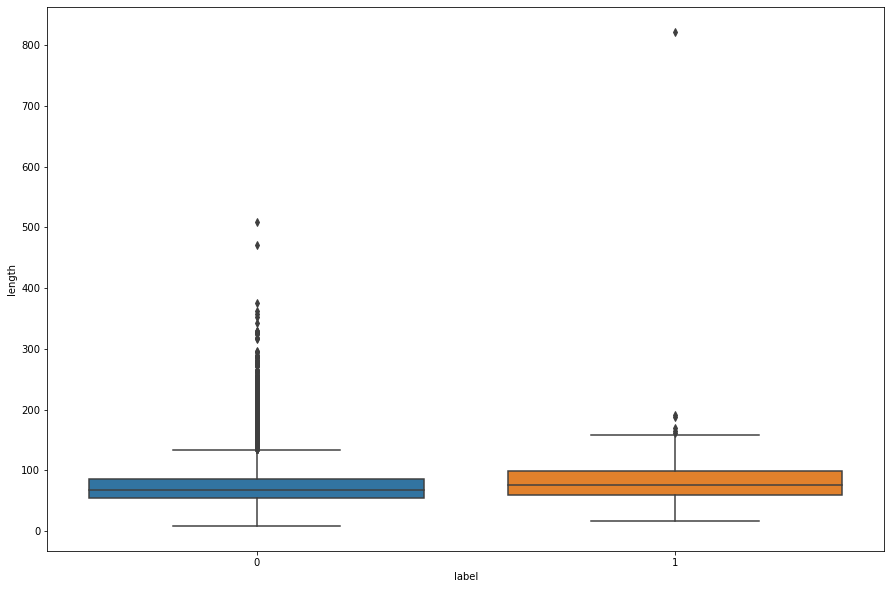

In [7]:
# Looking at the lengths of jokes and their distribution
plt.figure(figsize=(15,10))
train['length'] = train.text.apply(lambda x: len(x))
sns.boxplot(x='label',y='length',data=train)

In [8]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**List of Contractions in English Language: https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions**

In [9]:
# Function to expand the contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    #print(contractions_pattern)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        #print(expanded_contraction)
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    #print(expanded_text)
   # print(expanded_contraction)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# Function to clear the punctuations
def clear_punctuations(text):
    text = re.findall(r"[\w']+|[.,!?;]", text)
    text = ' '.join(text)
    return text

In [10]:
# Applying the expand contractions & Clear punctuations functions
train.text = train.text.apply(lambda x : expand_contractions(x))
train.text = train.text.apply(lambda x : clear_punctuations(x))

# Only using Sentences between length 30 & 140
df = train[(train.length >= 30) & (train.length <= 140)]
df = df.reset_index()

In [11]:
xtest = pd.read_pickle('X_test.pickle')
ytest = pd.read_pickle('y_test.pickle')

testdf = pd.DataFrame()
testdf['text'] = xtest
testdf['label'] = ytest

In [13]:
# Applying the expand contractions & Clear punctuations functions
testdf.text = testdf.text.apply(lambda x : expand_contractions(x))
testdf.text = testdf.text.apply(lambda x : clear_punctuations(x))
testdf['length'] = testdf.text.apply(lambda x: len(x))

# Only using Sentences between length 30 & 140
test = testdf[(testdf.length >= 30) & (testdf.length <= 140)]
test = test.reset_index()

In [14]:
# Creating a SentenceBERT Model with Pooling & Dense Layer to train our own model witht he available dataset.
# The maximum length of input string in 200 and the output will be a (200,) matrix.
word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=200)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=200, activation_function=nn.Tanh())

bert_model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

In [15]:
# Splitting all the Jokes and Non Jokes
jks = df.text[df.label == 1]
njks = df.text[df.label == 0]

# Deriving the Sentence Embeddings from our model
jokes = bert_model.encode(jks.tolist())
njokes = bert_model.encode(njks.tolist())

# A Huge matrix of Sentence Embeddings
sentences = np.concatenate((jokes,njokes),axis=0)

#Creating the labels
a = np.ones((len(df[df.label == 1]),))
b = np.zeros((len(df[df.label == 0]),))
labels = np.concatenate((a,b),axis=0)

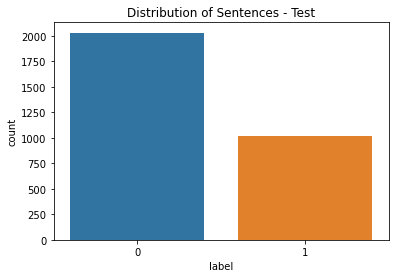

In [16]:
# Looking at Test Sentences Distribution
sns.countplot(x='label',data=test)
plt.title('Distribution of Sentences - Test')
plt.show()

In [42]:
# Embedding Test Sentences
tests = bert_model.encode(testdf.text)

### Model Selection based on Best F1 Score

In [18]:
# Looking at how all the classifiers behave for the train, valid & test Data.
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","LDA","Logistic Regression","Hybrid"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=.2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    LogisticRegression()]

X_train, X_valid, y_train, y_valid = \
    train_test_split(sentences, labels, test_size=.4, random_state=42)

threshold = np.sum(1*(y_train==1))/len(y_train)                            # Recommended threshold = n_1/n

Y_pred_valid = pd.DataFrame() # Declare a panda
Y_pred_valid['Class_true'] = y_valid

Y_pred_train = pd.DataFrame() # Declare a panda
Y_pred_train['Class_true'] = y_train

Y_pred_test = pd.DataFrame() # Declare a panda
Y_pred_test['Class_true'] = test.label

Y_results_test = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity']) 

Y_results_valid = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

Y_results_train = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred_valid,axis=1),0).astype(int)
        Y_pred_valid[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_valid, y_valid)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_valid)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_valid)
            Y_pred_valid[name] = Z
        else:
            Z = clf.predict_proba(X_valid)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred[prob_name] = Z
            Y_pred_valid[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_valid['Class_true']==1) & (Y_pred_valid[name] == 1))
    FP_output = 1*((Y_pred_valid['Class_true']==0) & (Y_pred_valid[name] == 1))
    TN_output = 1*((Y_pred_valid['Class_true']==0) & (Y_pred_valid[name] == 0))
    FN_output = 1*((Y_pred_valid['Class_true']==1) & (Y_pred_valid[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_valid = Y_results_valid.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    
    # Training performance
    if name is 'Hybrid':
        Z = np.round(np.median(Y_pred_train,axis=1),0).astype(int)
        Y_pred_train[name] = Z
    else:
        score = clf.score(X_train, y_train)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_train)
            #Y_pred_train[prob_name] = Z
            Z = clf.predict(X_train)
            Y_pred_train[name] = Z
        else:
            Z = clf.predict_proba(X_train)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred_train[prob_name] = Z
            Y_pred_train[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 1))
    FP_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 1))
    TN_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 0))
    FN_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_train = Y_results_train.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
        # Testing performance
    if name is 'Hybrid':
        Z = np.round(np.median(Y_pred_test,axis=1),0).astype(int)
        Y_pred_test[name] = Z
    else:
        score = clf.score(tests, test.label)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(tests)
            #Y_pred_train[prob_name] = Z
            Z = clf.predict(tests)
            Y_pred_test[name] = Z
        else:
            Z = clf.predict_proba(tests)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred_train[prob_name] = Z
            Y_pred_test[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_test['Class_true']==1) & (Y_pred_test[name] == 1))
    FP_output = 1*((Y_pred_test['Class_true']==0) & (Y_pred_test[name] == 1))
    TN_output = 1*((Y_pred_test['Class_true']==0) & (Y_pred_test[name] == 0))
    FN_output = 1*((Y_pred_test['Class_true']==1) & (Y_pred_test[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_test = Y_results_test.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    print('Finished running analysis for', name)

Finished running analysis for Nearest Neighbors
Finished running analysis for Linear SVM
Finished running analysis for RBF SVM
Finished running analysis for Decision Tree
Finished running analysis for Random Forest
Finished running analysis for Neural Net
Finished running analysis for AdaBoost
Finished running analysis for Naive Bayes
Finished running analysis for LDA
Finished running analysis for Logistic Regression
Finished running analysis for Hybrid


In [19]:
Y_results_train

,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,Nearest Neighbors,2407,163,4682,40,0.936576,0.983653,0.959538,0.972161,0.966357,0.983653
1,Linear SVM,2258,125,4720,189,0.947545,0.922763,0.934990,0.956939,0.974200,0.922763
2,RBF SVM,2377,54,4791,70,0.977787,0.971394,0.974580,0.982995,0.988854,0.971394
3,Decision Tree,2173,489,4356,274,0.816304,0.888026,0.850656,0.895365,0.899071,0.888026
4,Random Forest,2288,1042,3803,159,0.687087,0.935022,0.792107,0.835299,0.784933,0.935022
5,Neural Net,2348,197,4648,99,0.922593,0.959542,0.940705,0.959408,0.959340,0.959542
6,AdaBoost,2250,180,4665,197,0.925926,0.919493,0.922698,0.948300,0.962848,0.919493
7,Naive Bayes,2289,320,4525,158,0.877348,0.935431,0.905459,0.934449,0.933953,0.935431
8,LDA,2303,119,4726,144,0.950867,0.941152,0.945985,0.963933,0.975439,0.941152
9,Logistic Regression,2310,120,4725,137,0.950617,0.944013,0.947304,0.964756,0.975232,0.944013


In [20]:
Y_results_valid

,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,Nearest Neighbors,1611,187,3015,50,0.895996,0.969898,0.931483,0.951265,0.941599,0.969898
1,Linear SVM,1513,68,3134,148,0.956989,0.910897,0.933374,0.955583,0.978763,0.910897
2,RBF SVM,1547,50,3152,114,0.968691,0.931367,0.949662,0.966276,0.984385,0.931367
3,Decision Tree,1399,391,2811,262,0.781564,0.842264,0.810779,0.865721,0.877889,0.842264
4,Random Forest,1511,713,2489,150,0.679406,0.909693,0.777864,0.822538,0.777327,0.909693
5,Neural Net,1568,117,3085,93,0.930564,0.944010,0.937238,0.956817,0.963460,0.944010
6,AdaBoost,1476,141,3061,185,0.912801,0.888621,0.900549,0.932963,0.955965,0.888621
7,Naive Bayes,1558,205,2997,103,0.883721,0.937989,0.910047,0.936665,0.935978,0.937989
8,LDA,1531,64,3138,130,0.959875,0.921734,0.940418,0.960107,0.980012,0.921734
9,Logistic Regression,1527,59,3143,134,0.962799,0.919326,0.940561,0.960313,0.981574,0.919326


In [21]:
Y_results_test

,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,Nearest Neighbors,993,124,1910,26,0.888988,0.974485,0.929775,0.950868,0.939036,0.974485
1,Linear SVM,933,51,1983,86,0.948171,0.915604,0.931603,0.955126,0.974926,0.915604
2,RBF SVM,962,47,1987,57,0.953419,0.944063,0.948718,0.965935,0.976893,0.944063
3,Decision Tree,860,270,1764,159,0.761062,0.843965,0.800372,0.859482,0.867257,0.843965
4,Random Forest,942,485,1549,77,0.660126,0.924436,0.770237,0.815919,0.761554,0.924436
5,Neural Net,967,93,1941,52,0.912264,0.948970,0.930255,0.952506,0.954277,0.948970
6,AdaBoost,924,97,1937,95,0.904995,0.906771,0.905882,0.937111,0.952311,0.906771
7,Naive Bayes,956,128,1906,63,0.881919,0.938175,0.909177,0.937439,0.937070,0.938175
8,LDA,947,59,1975,72,0.941352,0.929342,0.935309,0.957091,0.970993,0.929342
9,Logistic Regression,948,61,1973,71,0.939544,0.930324,0.934911,0.956764,0.970010,0.930324


### Model Tuning - SVC with RBF Kernel

In [22]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(sentences, labels, test_size=.4, random_state=42)

In [26]:
# Checking for an optimum C value
c_range = np.arange(1,10,1)
gamma_range = np.arange(0.1,1,0.1)
f1 = np.ones(len(c_range))
f1_test = np.ones(len(c_range))
pr = np.ones(len(c_range))
pr_test = np.ones(len(c_range))
k = 0
for c in gamma_range:

    svc = SVC(gamma=c,C=0.3)
    svc.fit(X_train,y_train)
    pred_train = svc.predict(X_train)
    pred_test = svc.predict(X_valid)
    f1[k] = f1_score(y_train,pred_train)
    f1_test[k] = f1_score(y_valid,pred_test)
    pr[k] = precision_score(y_train,pred_train)
    pr_test[k] = precision_score(y_valid,pred_test)
    k = k+1

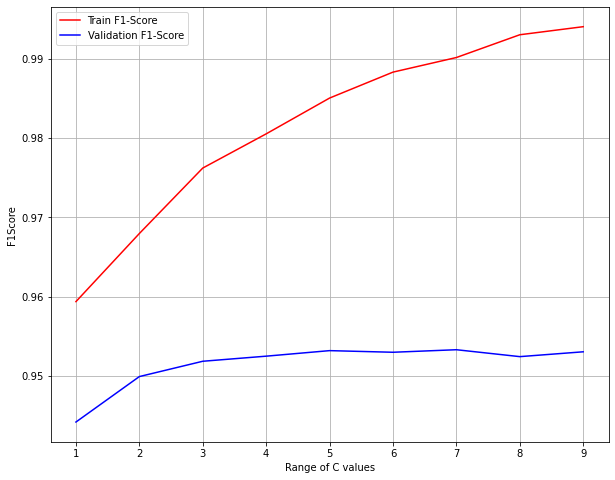

In [24]:
# Plotting the Maximum Depth Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(c_range,f1,'r',label='Train F1-Score')
line2, = plt.plot(c_range,f1_test,'b',label='Validation F1-Score')
plt.legend()
plt.xlabel('Range of C values')
plt.ylabel('F1Score')
plt.grid()
plt.show()

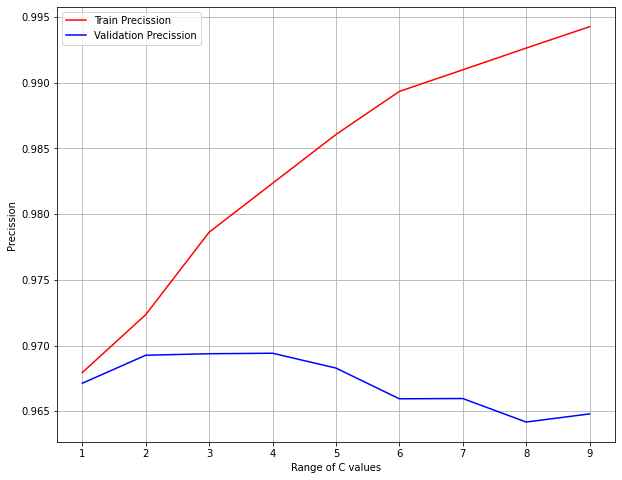

In [25]:
# Plotting the Maximum Depth Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(c_range,pr,'r',label='Train Precission')
line2, = plt.plot(c_range,pr_test,'b',label='Validation Precission')
plt.legend()
plt.xlabel('Range of C values')
plt.ylabel('Precission')
plt.grid()
plt.show()

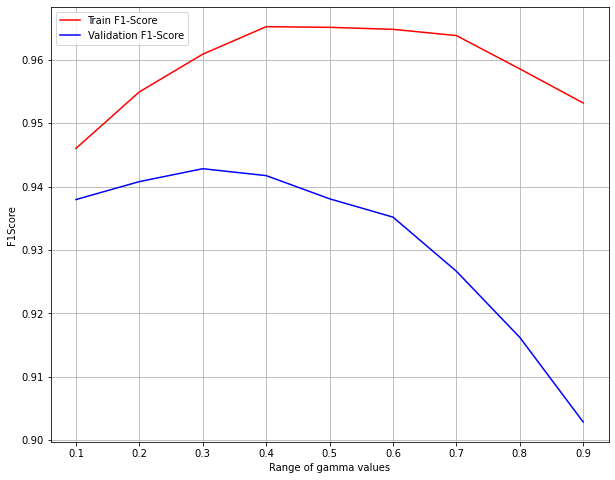

In [27]:
# Plotting the Maximum Depth Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(gamma_range,f1,'r',label='Train F1-Score')
line2, = plt.plot(gamma_range,f1_test,'b',label='Validation F1-Score')
plt.legend()
plt.xlabel('Range of gamma values')
plt.ylabel('F1Score')
plt.grid()
plt.show()

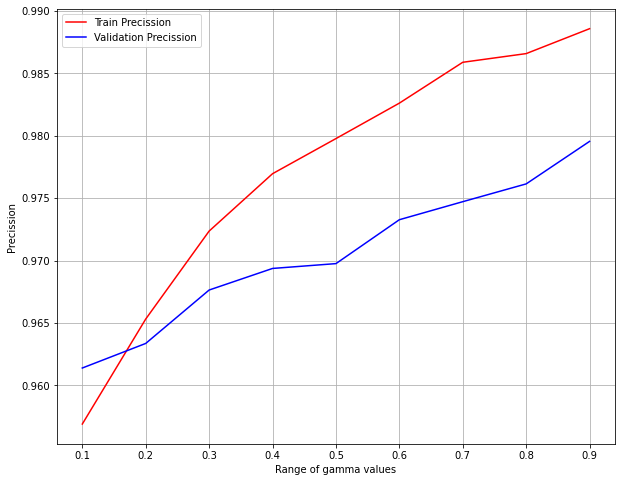

In [28]:
# Plotting the Maximum Depth Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(gamma_range,pr,'r',label='Train Precission')
line2, = plt.plot(gamma_range,pr_test,'b',label='Validation Precission')
plt.legend()
plt.xlabel('Range of gamma values')
plt.ylabel('Precission')
plt.grid()
plt.show()

### Final Model & Submission

In [45]:
# Final Model with RBF Kernel and tuned hyper-parameters.
svc = SVC(gamma=0.3,C=3)
svc.fit(sentences,labels)
preds = svc.predict(tests)
print('The F1 Score is:',(f1_score(preds,testdf.label))*100,'%')
print('The Precision is:',(precision_score(preds,testdf.label))*100,'%')
print('The Accuracy score is:',(accuracy_score(preds,testdf.label))*100,'%')

The F1 Score is: 95.51251771374586 %
The Precision is: 96.1941008563273 %
The Accuracy score is: 97.16840536512667 %


In [46]:
submission = pd.DataFrame()
submission['Id'] = testdf.index
submission['Prediction'] = preds
submission.to_csv('submission.csv',index=False)

### Jokes & Non-Jokes Visualizations

In [47]:
# Looking at the Sentence Embeddings and seeing how the SBERT Makes Sense
tsne = TSNE(n_components=2, perplexity=30, n_iter= 1000, verbose=1).fit_transform(sentences)

df1 = pd.DataFrame(tsne,columns=['x','y'])
df1['class'] = labels

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12147 samples in 0.303s...
[t-SNE] Computed neighbors for 12147 samples in 85.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12147
[t-SNE] Computed conditional probabilities for sample 2000 / 12147
[t-SNE] Computed conditional probabilities for sample 3000 / 12147
[t-SNE] Computed conditional probabilities for sample 4000 / 12147
[t-SNE] Computed conditional probabilities for sample 5000 / 12147
[t-SNE] Computed conditional probabilities for sample 6000 / 12147
[t-SNE] Computed conditional probabilities for sample 7000 / 12147
[t-SNE] Computed conditional probabilities for sample 8000 / 12147
[t-SNE] Computed conditional probabilities for sample 9000 / 12147
[t-SNE] Computed conditional probabilities for sample 10000 / 12147
[t-SNE] Computed conditional probabilities for sample 11000 / 12147
[t-SNE] Computed conditional probabilities for sample 12000 / 12147
[t-SNE] Computed conditional probabilities for sa

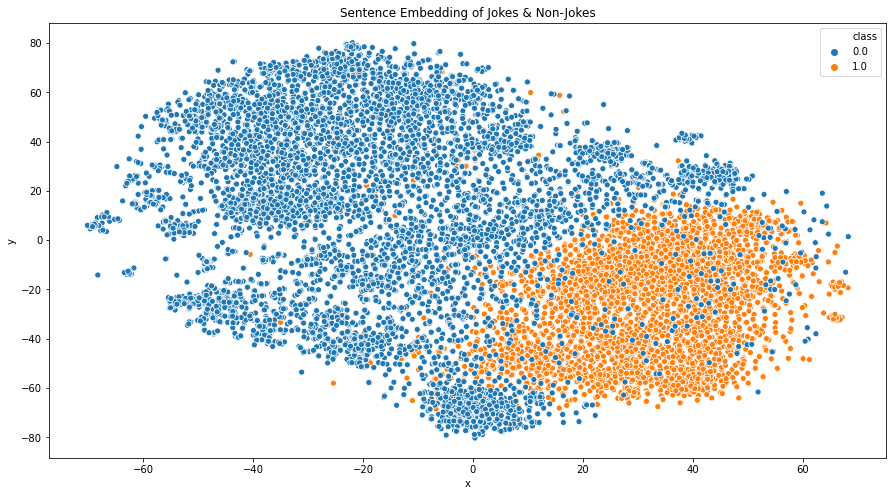

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'x', y = 'y', data=df1, hue='class')
plt.title('Sentence Embedding of Jokes & Non-Jokes')
plt.show()